In [ ]:
#pytorch installation below

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 34.6 MB/s eta 0:01:11
     ---------------------------------------- 0.0/2.5 GB 37.7 MB/s eta 0:01:06
     ---------------------------------------- 0.0/2.5 GB 26.5 MB/s eta 0:01:33
     ---------------------------------------- 0.0/2.5 GB 25.4 MB/s eta 0:01:37
     ---------------------------------------- 0.0/2.5 GB 23.6 MB/s eta 0:01:44
     ---------------------------------------- 0.0/2.5 GB 21.4 MB/s eta 0:01:55
     ---------------------------------------- 0.0/2.5 GB 21.5 MB/s eta 0:01:55
     ---------------------------------------- 0.0/2.5 GB 20.6 MB/s eta 0:01:59
     ---------------------------------------- 0.0/2.5 GB 19.6 MB/s eta 0:02:06
     ---------------------------------------- 0.0/2.5 GB 19.3 MB/s eta 0:02:07
     ---------------------------------------- 0.0/2.5 GB 18.6 MB/s eta 0:02:12
 

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import os
os.sys.path

['C:\\Users\\asus\\MINOR Project',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\python312.zip',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\DLLs',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\Lib',
 'C:\\Users\\asus\\anaconda3\\envs\\test',
 '',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\Lib\\site-packages',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\Lib\\site-packages\\win32',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\asus\\anaconda3\\envs\\test\\Lib\\site-packages\\Pythonwin']

In [ ]:
#importing all the important libraries

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
#importing the pre-trained yolov5 model from pytorch hub

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\asus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-21 Python-3.12.1 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
#working of yolov5 on a sample image

In [8]:
imgs = 'https://img.freepik.com/free-photo/cars-city-traffic-daylight_23-2149092084.jpg?w=1380&t=st=1707628521~exp=1707629121~hmac=2a4d1e7ad79e7e6bccd1c62869b84f1232b61f419e4b5c3245732e2fb5fc55c8'
results = model(imgs)
results.print()

image 1/1: 918x1380 7 persons, 12 cars, 3 trucks
Speed: 638.0ms pre-process, 193.3ms inference, 184.1ms NMS per image at shape (1, 3, 448, 640)


In [ ]:
#renders the image with the bounding boxes

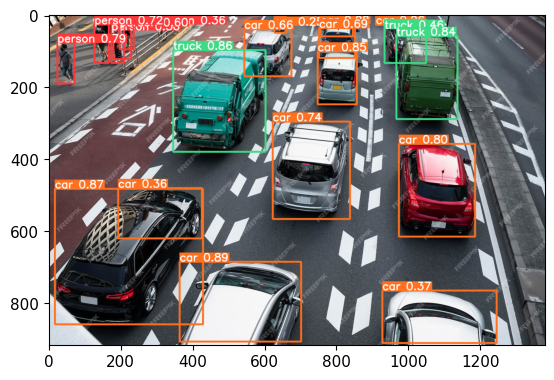

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[217, 201, 175],
         [245, 231, 205],
         [247, 232, 211],
         ...,
         [ 41,  48,  56],
         [ 44,  51,  59],
         [ 45,  52,  60]],
 
        [[180, 164, 139],
         [180, 165, 142],
         [224, 211, 192],
         ...,
         [ 43,  48,  54],
         [ 46,  51,  57],
         [ 47,  52,  58]],
 
        [[219, 204, 183],
         [197, 184, 165],
         [189, 177, 161],
         ...,
         [ 42,  46,  49],
         [ 47,  51,  54],
         [ 49,  53,  56]],
 
        ...,
 
        [[204, 214, 223],
         [204, 214, 223],
         [204, 214, 223],
         ...,
         [ 89,  90,  95],
         [ 88,  89,  94],
         [ 86,  87,  92]],
 
        [[205, 215, 224],
         [204, 214, 223],
         [204, 214, 223],
         ...,
         [ 87,  88,  93],
         [ 86,  87,  92],
         [ 85,  86,  91]],
 
        [[205, 215, 224],
         [204, 214, 223],
         [204, 214, 223],
         ...,
         [ 84,  85,  90],
  

In [ ]:
#using open cv loop to collect the real time data

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO' ,np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
import uuid
import os
import time 

In [ ]:
IMAGES_PATH =os.path.join('data' ,'images')
labels = ['awake' ,'drowsy']
number_imgs = 20;

In [ ]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('collecting images for {} '.format(labels))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('collecting images for {} ,image number {}', img_num)
        ret , frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
         break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#label image package used to label custom images and train yolo on it

In [11]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [ ]:
#these two line are used to install the dependencies for the label image package

In [12]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
#this command will try our custom yolo model setting the input image at 320 pixels batch size at 16 imgs per batch and will run for 500 epochs

In [20]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 20 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\asus\MINOR': No such file or directory
YOLOv5  2024-2-11 Python-3.12.1 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0

In [ ]:
#loading our trained custom model

In [25]:
model = torch.hub.load('ultralytics/yolov5' , 'custom' , path='yolov5/runs/train/exp5/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\asus/.cache\torch\hub\master.zip
YOLOv5  2024-4-21 Python-3.12.1 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [26]:
img = os.path.join('data' , 'images' ,'Drowsy-20.jpg')

In [27]:
results = model(img)

In [28]:
results.print()

image 1/1: 1080x1920 1 drowsy
Speed: 15.6ms pre-process, 12.1ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


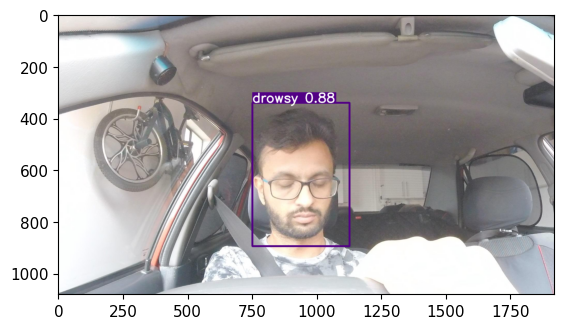

In [29]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO' ,np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [20]:
!pip install customtkinter

   ---------------------------------------- 0.0/296.1 kB ? eta -:--:--
   -- ------------------------------------ 20.5/296.1 kB 682.7 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/296.1 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 296.1/296.1 kB 3.7 MB/s eta 0:00:00


In [22]:
!pip install python-vlc

   ---------------------------------------- 0.0/79.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/79.9 kB ? eta -:--:--
   ---------------------------------------- 79.9/79.9 kB 1.5 MB/s eta 0:00:00


In [2]:
!pip install pygame

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.8 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.8 MB 8.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.8 MB 10.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.8 MB 11.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.8 MB 13.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.8 MB 15.1 MB/s eta 0:00:01
   --------------------- ------------------ 5.7/10.8 MB 16.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.7/10.8 MB 17.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.8 MB 16.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.7/10.8 MB 15.9 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.8 MB 14.8 MB/s eta 0:00:

In [1]:
import tkinter as tk
import customtkinter as ctk
import random
import torch
import numpy as np
import cv2
from PIL import Image, ImageTk
import vlc

app = tk.Tk()
app.geometry("900x800")
app.title("Aware-Drive")

ctk.set_appearance_mode("Dark")

videoFrame = tk.Frame(app, height=500, width=600)
videoFrame.pack()

videoLabel = ctk.CTkLabel(videoFrame)
videoLabel.pack()

counter = 0
counter_threshold = 20  # Initial threshold for counter reset and alarm stop

counterLabel = ctk.CTkLabel(app, text="Counter", height=40, width=100, font=("Arial", 20), text_color="red")
counterLabel.pack(pady=10)

def reset_counter():
    global counter
    counter = 0
    counterLabel.configure(text=str(counter))

def increase_threshold():
    global counter_threshold
    counter_threshold += 10
    counterLabel.configure(text=f"Counter (Threshold: {counter_threshold})")

def decrease_threshold():
    global counter_threshold
    if counter_threshold >= 10:
        counter_threshold -= 10
    counterLabel.configure(text=f"Counter (Threshold: {counter_threshold})")

resetButton = ctk.CTkButton(app, text="Reset Counter", command=reset_counter, height=40, width=100, font=("Arial", 20))
resetButton.pack()

increaseButton = ctk.CTkButton(app, text="Increase Threshold", command=increase_threshold, height=40, width=100, font=("Arial", 20))
increaseButton.pack()

decreaseButton = ctk.CTkButton(app, text="Decrease Threshold", command=decrease_threshold, height=40, width=100, font=("Arial", 20))
decreaseButton.pack()

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

cap = cv2.VideoCapture(0)  # Change the index to the correct webcam index if needed

def detect():
    global counter, counter_threshold

    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(frame)
    img = np.squeeze(results.render())

    if len(results.xyxy[0]) > 0:
        print(results.xywh[0])
        dconf = results.xyxy[0][0][4]
        dclass = results.xyxy[0][0][5]
        if dconf.item() > 0.85 and dclass.item() == 16.0:
            if counter > counter_threshold:
                filechoice = random.choice([2])
                p = vlc.MediaPlayer(f"file:///{filechoice}.wav")
                p.event_manager().event_attach(vlc.EventType.MediaPlayerEndReached, on_end)
                p.play()
                counter = 0  # Reset counter after playing the audio

            counter += 1  # Increment the counter by 1 for every frame
            if counter > 15:
                counterLabel.configure(text_color="red")
            else:
                counterLabel.configure(text_color="black")  # or any other color you prefer

    imageArr = Image.fromarray(frame)
    imageTk = ImageTk.PhotoImage(imageArr)
    videoLabel.imageTk = imageTk
    videoLabel.configure(image=imageTk)

    counterLabel.configure(text=f"Counter (Threshold: {counter_threshold}, Count: {counter})")
    app.after(10, detect)

def on_end(event):
    event.media_player.stop()
    detect()  # Call detect again to resume detection loop after the audio ends

detect()
app.mainloop()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\asus/.cache\torch\hub\master.zip
YOLOv5  2024-4-26 Python-3.12.1 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


tensor([[9.77777e+01, 9.64607e+01, 1.95555e+02, 1.92632e+02, 8.73782e-01, 1.60000e+01],
        [3.22146e+02, 1.66202e+02, 1.41013e+02, 1.64183e+02, 8.67576e-01, 1.50000e+01],
        [4.24351e+02, 2.21139e+02, 9.12477e+01, 1.33797e+02, 8.14173e-01, 1.50000e+01],
        [6.07348e+02, 1.75369e+02, 6.42858e+01, 1.75065e+02, 6.30007e-01, 1.50000e+01],
        [1.52224e+02, 4.55008e+02, 1.04807e+02, 4.76207e+01, 4.11339e-01, 1.50000e+01]], device='cuda:0')
tensor([[4.35393e+02, 2.20474e+02, 9.03517e+01, 1.26528e+02, 9.16692e-01, 1.50000e+01],
        [3.23261e+02, 1.62583e+02, 1.36818e+02, 1.54692e+02, 8.20644e-01, 1.50000e+01],
        [9.50342e+01, 9.49775e+01, 1.90068e+02, 1.89955e+02, 7.57133e-01, 1.50000e+01],
        [9.70422e+01, 9.48507e+01, 1.94084e+02, 1.87839e+02, 7.06548e-01, 1.60000e+01],
        [6.03982e+02, 1.73772e+02, 7.01205e+01, 1.83688e+02, 3.50483e-01, 1.60000e+01]], device='cuda:0')
tensor([[436.21844, 220.11380,  88.53888, 125.43085,   0.92365,  15.00000],
        

Exception ignored on calling ctypes callback function: <function EventManager.event_attach.<locals>._callback_handler at 0x000001CA586ED440>
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\envs\test\Lib\site-packages\vlc.py", line 1776, in _callback_handler
    call(event.contents, *args, **kwds)
  File "C:\Users\asus\AppData\Local\Temp\ipykernel_11092\3159367852.py", line 92, in on_end
AttributeError: 'Event' object has no attribute 'media_player'


tensor([[287.12790, 244.65424, 157.34003, 179.62976,   0.94669,  15.00000]], device='cuda:0')
tensor([[286.35767, 246.82080, 158.21617, 192.22597,   0.95769,  15.00000]], device='cuda:0')
tensor([[279.34634, 233.41341, 146.97388, 184.36020,   0.94530,  15.00000]], device='cuda:0')
tensor([[272.78839, 223.57072, 141.24535, 175.19308,   0.93989,  15.00000]], device='cuda:0')
tensor([[271.32004, 224.32498, 140.93134, 179.23810,   0.94007,  15.00000]], device='cuda:0')
tensor([[261.15979, 219.09637, 132.89270, 166.41809,   0.91868,  15.00000]], device='cuda:0')
tensor([[259.40570, 217.52234, 133.32373, 164.84723,   0.89041,  15.00000]], device='cuda:0')
tensor([[2.55040e+02, 2.22336e+02, 1.35768e+02, 1.67388e+02, 8.94960e-01, 1.50000e+01],
        [6.25565e+02, 2.61826e+02, 2.73142e+01, 1.54483e+02, 3.48311e-01, 1.60000e+01]], device='cuda:0')
tensor([[2.53861e+02, 2.18616e+02, 1.36473e+02, 1.62780e+02, 9.14415e-01, 1.50000e+01],
        [6.22174e+02, 2.54024e+02, 3.48693e+01, 1.47094e+02,

Exception ignored on calling ctypes callback function: <function EventManager.event_attach.<locals>._callback_handler at 0x000001CA586ED580>
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\envs\test\Lib\site-packages\vlc.py", line 1776, in _callback_handler
    call(event.contents, *args, **kwds)
  File "C:\Users\asus\AppData\Local\Temp\ipykernel_11092\3159367852.py", line 92, in on_end
AttributeError: 'Event' object has no attribute 'media_player'


tensor([[315.27417, 217.03253, 157.93768, 177.17494,   0.91834,  15.00000],
        [585.58484, 257.54651,  99.96887, 149.24237,   0.87219,  16.00000],
        [ 64.86867,  83.32506, 129.73734, 166.65012,   0.70101,  16.00000]], device='cuda:0')
tensor([[3.30658e+02, 2.17340e+02, 1.54067e+02, 1.85953e+02, 8.81189e-01, 1.60000e+01],
        [5.85653e+02, 2.54209e+02, 1.03727e+02, 1.58190e+02, 8.30507e-01, 1.60000e+01],
        [3.29849e+02, 2.13166e+02, 1.33652e+02, 1.65287e+02, 4.82757e-01, 1.50000e+01]], device='cuda:0')
tensor([[587.16364, 252.04233, 102.80713, 162.64056,   0.87762,  16.00000],
        [335.26450, 215.11824, 143.44464, 187.75320,   0.87408,  15.00000],
        [ 76.21680,  85.25938, 152.43361, 170.51877,   0.76922,  16.00000],
        [333.97842, 213.14606, 159.14990, 190.38344,   0.76350,  16.00000]], device='cuda:0')
tensor([[3.52229e+02, 2.13825e+02, 1.36830e+02, 1.88175e+02, 8.73088e-01, 1.60000e+01],
        [8.11150e+01, 7.55611e+01, 1.62230e+02, 1.51122e+02, 5

Exception ignored on calling ctypes callback function: <function EventManager.event_attach.<locals>._callback_handler at 0x000001CA394276A0>
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\envs\test\Lib\site-packages\vlc.py", line 1776, in _callback_handler
    call(event.contents, *args, **kwds)
  File "C:\Users\asus\AppData\Local\Temp\ipykernel_11092\3159367852.py", line 92, in on_end
AttributeError: 'Event' object has no attribute 'media_player'


tensor([[2.92007e+02, 1.85183e+02, 1.31314e+02, 1.49630e+02, 9.23177e-01, 1.50000e+01],
        [4.68844e+02, 1.99371e+02, 1.01066e+02, 1.35275e+02, 8.69421e-01, 1.50000e+01],
        [2.10298e+01, 3.48740e+02, 4.20595e+01, 2.07302e+02, 2.65578e-01, 1.60000e+01]], device='cuda:0')
tensor([[2.92171e+02, 1.88939e+02, 1.34733e+02, 1.57613e+02, 8.97927e-01, 1.50000e+01],
        [4.68854e+02, 2.01341e+02, 1.00494e+02, 1.41959e+02, 7.54446e-01, 1.50000e+01],
        [2.03304e+01, 3.48340e+02, 4.06609e+01, 2.07413e+02, 2.84408e-01, 1.60000e+01]], device='cuda:0')
tensor([[292.36844, 186.56470, 133.25061, 151.99225,   0.91892,  15.00000],
        [469.04901, 192.83981, 102.65158, 133.09607,   0.81961,  15.00000]], device='cuda:0')
tensor([[2.93012e+02, 1.84085e+02, 1.31809e+02, 1.47896e+02, 9.38808e-01, 1.50000e+01],
        [4.70151e+02, 1.89528e+02, 1.01872e+02, 1.25107e+02, 8.04339e-01, 1.50000e+01],
        [2.03040e+01, 7.35741e+01, 4.00019e+01, 1.43115e+02, 3.55971e-01, 1.50000e+01]], d